In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yossefazam/carprices")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\yossefazam\carprices\versions\1


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [3]:
# Assuming the dataset contains a CSV file named 'carprices.csv'
file_path = f"{path}/carprices.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


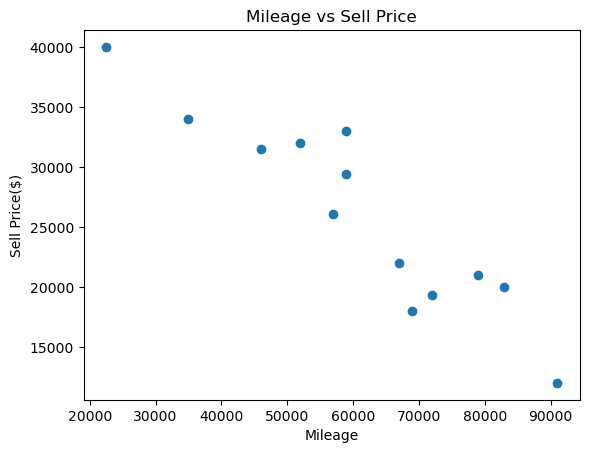

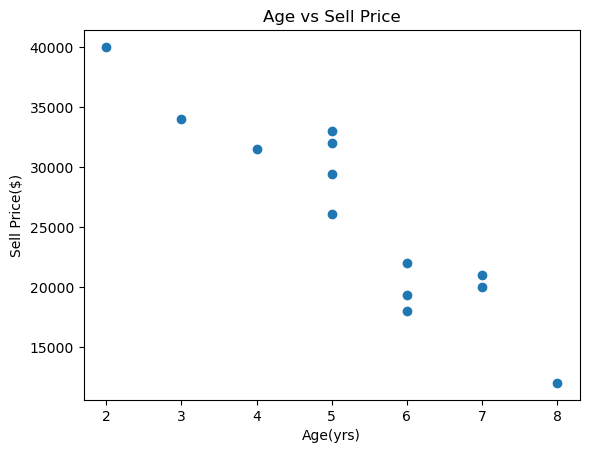

In [7]:
#Plotting
plt.scatter(data['Mileage'], data['Sell Price($)'])
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.title('Mileage vs Sell Price')
plt.show()

plt.scatter(data['Age(yrs)'], data['Sell Price($)'])
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price($)')
plt.title('Age vs Sell Price')
plt.show()


In [9]:
#  One Hot Encoding
dummies = pd.get_dummies(data['Car Model'])
print(dummies)

    Audi A5  BMW X5  Mercedez Benz C class
0     False    True                  False
1     False    True                  False
2     False    True                  False
3     False    True                  False
4     False    True                  False
5      True   False                  False
6      True   False                  False
7      True   False                  False
8      True   False                  False
9     False   False                   True
10    False   False                   True
11    False   False                   True
12    False   False                   True


In [10]:
merged = pd.concat([data, dummies], axis='columns')
final = merged.drop(['Car Model'], axis='columns')
print(final)

    Mileage  Sell Price($)  Age(yrs)  Audi A5  BMW X5  Mercedez Benz C class
0     69000          18000         6    False    True                  False
1     35000          34000         3    False    True                  False
2     57000          26100         5    False    True                  False
3     22500          40000         2    False    True                  False
4     46000          31500         4    False    True                  False
5     59000          29400         5     True   False                  False
6     52000          32000         5     True   False                  False
7     72000          19300         6     True   False                  False
8     91000          12000         8     True   False                  False
9     67000          22000         6    False   False                   True
10    83000          20000         7    False   False                   True
11    79000          21000         7    False   False                   True

In [11]:
# Features (X) and Target (y)
X = final.drop('Sell Price($)', axis='columns')
y = final['Sell Price($)']

In [12]:
# Split dataset (optional but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [13]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predictions
# Predict price of a mercedes benz that is 4 yr old with mileage 45000
# Manual creation of input array:
# Mileage = 45000, Age = 4, Audi A5 = 0, BMW X5 = 0, Mercedez Benz C class = 1
predicted_price_1 = model.predict([[45000, 4, 0, 0, 1]])
print(f"Predicted price for Mercedes Benz (4yr, 45000 miles): ${predicted_price_1[0]:.2f}")


Predicted price for Mercedes Benz (4yr, 45000 miles): $38844.76


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
# Predict price of a BMW X5 that is 7 yr old with mileage 86000
# Mileage = 86000, Age = 7, Audi A5 = 0, BMW X5 = 1, Mercedez Benz C class = 0
predicted_price_2 = model.predict([[86000, 7, 0, 1, 0]])
print(f"Predicted price for BMW X5 (7yr, 86000 miles): ${predicted_price_2[0]:.2f}")


Predicted price for BMW X5 (7yr, 86000 miles): $10417.46


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
# Model Accuracy
score = model.score(X_test, y_test)
print(f"Model accuracy: {score:.2f}")

Model accuracy: 0.69
